In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [3]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [4]:
  # useful for getting number of classes
folders = glob('Datasets/train/*')

In [5]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [6]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [11]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [12]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\rohan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
41/41 [==============================] - 394s 10s/step - loss: 0.3367 - accuracy: 0.8635 - val_loss: 0.3078 - val_accuracy: 0.8878
Epoch 2/5
41/41 [==============================] - 370s 9s/step - loss: 0.1359 - accuracy: 0.9480 - val_loss: 0.3264 - val_accuracy: 0.8798
Epoch 3/5
41/41 [==============================] - 368s 9s/step - loss: 0.1035 - accuracy: 0.9617 - val_loss: 0.2536 - val_accuracy: 0.9151
Epoch 4/5
41/41 [==============================] - 370s 9s/step - loss: 0.0969 - accuracy: 0.9653 - val_loss: 0.3116 - val_accuracy: 0.9038
Epoch 5/5
41/41 [==============================] - 370s 9s/step - loss: 0.0861 - accuracy: 0.9693 - val_loss: 0.2716 - val_accuracy: 0.9135


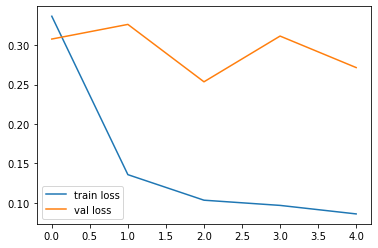

<Figure size 432x288 with 0 Axes>

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [14]:
r.history

{'loss': [0.3367112874984741,
  0.13585516810417175,
  0.10346747189760208,
  0.09687019139528275,
  0.08607026189565659],
 'accuracy': [0.8634969592094421,
  0.94804447889328,
  0.9616564512252808,
  0.9652990698814392,
  0.9693251252174377],
 'val_loss': [0.30779749155044556,
  0.3263648748397827,
  0.25358158349990845,
  0.3115735650062561,
  0.2716265916824341],
 'val_accuracy': [0.8878205418586731,
  0.879807710647583,
  0.9150640964508057,
  0.9038461446762085,
  0.9134615659713745]}

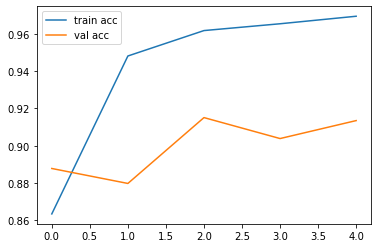

<Figure size 432x288 with 0 Axes>

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [17]:
# Now we write the code to predict the image classification as "Infected" or "Uninfected"

In [19]:
## Predicting Models
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('model_vgg19.h5')

In [20]:
img = image.load_img('Datasets/val/PNEUMONIA/person1946_bacteria_4874.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x

array([[[ 16.,  16.,  16.],
        [ 19.,  19.,  19.],
        [ 20.,  20.,  20.],
        ...,
        [ 13.,  13.,  13.],
        [ 11.,  11.,  11.],
        [ 12.,  12.,  12.]],

       [[ 16.,  16.,  16.],
        [ 19.,  19.,  19.],
        [ 18.,  18.,  18.],
        ...,
        [ 16.,  16.,  16.],
        [ 18.,  18.,  18.],
        [ 19.,  19.,  19.]],

       [[ 16.,  16.,  16.],
        [ 19.,  19.,  19.],
        [ 20.,  20.,  20.],
        ...,
        [ 23.,  23.,  23.],
        [ 19.,  19.,  19.],
        [ 16.,  16.,  16.]],

       ...,

       [[  5.,   5.,   5.],
        [  1.,   1.,   1.],
        [  6.,   6.,   6.],
        ...,
        [  2.,   2.,   2.],
        [  1.,   1.,   1.],
        [  0.,   0.,   0.]],

       [[255., 255., 255.],
        [ 43.,  43.,  43.],
        [  6.,   6.,   6.],
        ...,
        [  2.,   2.,   2.],
        [ 27.,  27.,  27.],
        [255., 255., 255.]],

       [[  0.,   0.,   0.],
        [  5.,   5.,   5.],
        [  6.,  

In [21]:
x = np.expand_dims(x, axis=0)
x, x.shape

(array([[[[ 16.,  16.,  16.],
          [ 19.,  19.,  19.],
          [ 20.,  20.,  20.],
          ...,
          [ 13.,  13.,  13.],
          [ 11.,  11.,  11.],
          [ 12.,  12.,  12.]],
 
         [[ 16.,  16.,  16.],
          [ 19.,  19.,  19.],
          [ 18.,  18.,  18.],
          ...,
          [ 16.,  16.,  16.],
          [ 18.,  18.,  18.],
          [ 19.,  19.,  19.]],
 
         [[ 16.,  16.,  16.],
          [ 19.,  19.,  19.],
          [ 20.,  20.,  20.],
          ...,
          [ 23.,  23.,  23.],
          [ 19.,  19.,  19.],
          [ 16.,  16.,  16.]],
 
         ...,
 
         [[  5.,   5.,   5.],
          [  1.,   1.,   1.],
          [  6.,   6.,   6.],
          ...,
          [  2.,   2.,   2.],
          [  1.,   1.,   1.],
          [  0.,   0.,   0.]],
 
         [[255., 255., 255.],
          [ 43.,  43.,  43.],
          [  6.,   6.,   6.],
          ...,
          [  2.,   2.,   2.],
          [ 27.,  27.,  27.],
          [255., 255., 255.

In [22]:
img_data = preprocess_input(x)
img_data

array([[[[ -87.939   , -100.779   , -107.68    ],
         [ -84.939   ,  -97.779   , -104.68    ],
         [ -83.939   ,  -96.779   , -103.68    ],
         ...,
         [ -90.939   , -103.779   , -110.68    ],
         [ -92.939   , -105.779   , -112.68    ],
         [ -91.939   , -104.779   , -111.68    ]],

        [[ -87.939   , -100.779   , -107.68    ],
         [ -84.939   ,  -97.779   , -104.68    ],
         [ -85.939   ,  -98.779   , -105.68    ],
         ...,
         [ -87.939   , -100.779   , -107.68    ],
         [ -85.939   ,  -98.779   , -105.68    ],
         [ -84.939   ,  -97.779   , -104.68    ]],

        [[ -87.939   , -100.779   , -107.68    ],
         [ -84.939   ,  -97.779   , -104.68    ],
         [ -83.939   ,  -96.779   , -103.68    ],
         ...,
         [ -80.939   ,  -93.779   , -100.68    ],
         [ -84.939   ,  -97.779   , -104.68    ],
         [ -87.939   , -100.779   , -107.68    ]],

        ...,

        [[ -98.939   , -111.779   , -1

In [23]:
classes = model.predict(img_data)
classes

array([[0., 1.]], dtype=float32)

In [24]:
a = np.argmax(classes, axis = 1)
if (a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
